# Projeto TEMTEM
- Esse projeto tem como objetivo treinar minhas habilidades em python e ciência de dados
- Vamos usar a API do temtem https://temtem-api.mael.tech
- Alguns dos objetivos
    - Organizar numa tabela informações principais dos temtem
    - Organizar em outra tabela ou arquivo informações mais detalhadas de TemTem
    - Descobrir os valores médios dos atributos de cada tipo de temtem
    - Descobrir os temtem que tem os melhores valores de cada atributo (por exemplo, o temtem que tem mais HP)
    - Mais detalhes para o futuro
   
# Sobre TEMTEM
- Temtem é um jogo de captura e treinamento de monstros conhecidos como temtems, treinamos esses monstros para participar de batalhas e ser o melhor domador de temtems
- Atualmente tem 164 Temtems
- Cada temtem tem propriedades que são:
    - Tipo do temtem
    - Atributos de batalha
    - Movimentos de batalha
    - Detalhes como altura e peso
    - Um campo de trivia
    - Evoluções sendo a primeira evolução stage 1
    - Localização do temtem
    - Um retrato do temtem
    - A chance de domar um temtem
    - Tempo que demora para nascer um ovo do temtem
- Queremos descobrir mais informações dos temtem para tornar um domador melhor
- Um temtem pode ter somente 1 trait de dois possíveis traits

# Escolhas do projeto
- Foi escolhido que não é importante saber as técnicas de combate que os temtem aprendem, apenas informações sobre seus atributos
- Na parte de evolução só é importante saber se o temtem evolui ou não, não precisamos de detalhes da sua evolução
- Detalhes da evolução pode ser guardade em uma nova tabela para futuras avaliações se necessário

In [1]:
import requests
import pandas as pd
import numpy as np

#### requests.get()
- A função requests.get() retorna um objeto de resposta, podemos usar o atributo resposta.status_code para receber o código de resposta de nossa resposta

### Tipos de resposta de api
- 200: Aconteceu tudo certo e o resultado foi retornado (se tiver resultado pra ser retornado)
- 301: O servidor está redirecionado você para um novo endpoint. Isso pode acontecer com empresas que trocam o nome do domínio ou o nome de um endpoint foi trocado
- 400: Esse servidor acha que você fez um bad request. Isso pode acontecer quando você não manda os dados certos entre outrasc coisas
- 401: Esse servidor acha que você não está autenticado. Muitas API's precisam de um login de credenciais, então isso acontece quando você não tem as credenciais certas para acessar a API
- 403: O recurso que você está tentando acessar é poibido, e você não ter as permissões certas para ver
- 404: O recurso que você está tentando acessar não existe no servidor
- 503: O servidor não está pronto para esse tipo de request

### Informações que queremos guardar do JSON do TEMTEM
- number
- name
- types
- stats
- traits
- details
- techniques
- evolution
- genderRatio
- catchRate
- hatchMins
- tvYields (esse campo é o quanto de tv o seu temtem ganha ao derrotar esse temtem em uma batalha)

In [2]:
# Criando um dicionário para organizar as informações necessárias
def cria_dict(resposta_json):
    dict_info_temtems = {
        'number': resposta_json['number'],
        'name': resposta_json['name'],
        'hp': resposta_json['stats']['hp'],
        'sta': resposta_json['stats']['sta'],
        'spd': resposta_json['stats']['spd'],
        'atk': resposta_json['stats']['atk'],
        'def': resposta_json['stats']['def'],
        'spatk': resposta_json['stats']['spatk'],
        'spdef': resposta_json['stats']['spdef'],
        'total': resposta_json['stats']['total'],
        'height_cm': resposta_json['details']['height']['cm'],
        'weight_kg': resposta_json['details']['weight']['kg'],
        'trait 1': resposta_json['traits'][0],
        'trait 2': resposta_json['traits'][1],
        'male': resposta_json['genderRatio']['male'],
        'female': resposta_json['genderRatio']['female'],
        'catchRate': resposta_json['catchRate'],
        'hatchMins': resposta_json['hatchMins'],
        'tvHP': resposta_json['tvYields']['hp'],
        'tvSTA': resposta_json['tvYields']['sta'],
        'tvSPD': resposta_json['tvYields']['spd'],
        'tvATK': resposta_json['tvYields']['atk'],
        'tvDEF': resposta_json['tvYields']['def'],
        'tvSPATK': resposta_json['tvYields']['spatk'],
        'tvSPDEF': resposta_json['tvYields']['spdef']
    }
    # Temos que verificar se um temtem tem dois tipos para adicionar
    dict_info_temtems['type 1'] = resposta_json['types'][0]
    if len(resposta_json['types']) == 2:
        dict_info_temtems['type 2'] = resposta_json['types'][1]
    else:
        dict_info_temtems['type 2'] = None

    # Verifica se ele tem evolução
    if resposta_json['evolution']['evolves'] == False:
        dict_info_temtems['evolution'] = False
    else:
        dict_info_temtems['evolution'] = True
    return dict_info_temtems

In [3]:
# Criando loop para pegar informações de todos os temtem
lista_temtems = []
for numero_temtem in range(1, 165):
    endereco = f"https://temtem-api.mael.tech/api/temtems/{numero_temtem}"
    resposta = requests.get(endereco)
    temp_dict = cria_dict(resposta.json())
    lista_temtems.append(temp_dict)

In [4]:
len(lista_temtems)

164

In [5]:
lista_temtems[77]

{'number': 78,
 'name': 'Cycrox',
 'hp': 73,
 'sta': 62,
 'spd': 48,
 'atk': 54,
 'def': 61,
 'spatk': 75,
 'spdef': 71,
 'total': 444,
 'height_cm': 132,
 'weight_kg': 41,
 'trait 1': 'Neurotoxins',
 'trait 2': 'Water Synthesizer',
 'male': 20,
 'female': 80,
 'catchRate': 90,
 'hatchMins': 27,
 'tvHP': 0,
 'tvSTA': 0,
 'tvSPD': 0,
 'tvATK': 0,
 'tvDEF': 0,
 'tvSPATK': 2,
 'tvSPDEF': 0,
 'type 1': 'Digital',
 'type 2': 'Toxic',
 'evolution': False}

In [6]:
# com isso temos uma lista com todos os temtems
# Vamos criar a tabela com todas as informações
df_temtems = pd.DataFrame(data=lista_temtems, columns=lista_temtems[0].keys())

In [7]:
df_temtems

,number,name,hp,sta,spd,atk,def,spatk,spdef,total,...,tvHP,tvSTA,tvSPD,tvATK,tvDEF,tvSPATK,tvSPDEF,type 1,type 2,evolution
0,1,Mimit,55,55,55,55,65,55,65,405,...,0,0,0,0,1,0,1,Digital,None,False
1,2,Oree,61,74,35,65,44,32,31,342,...,0,1,0,0,0,0,0,Digital,None,True
2,3,Zaobian,72,90,51,84,50,42,44,433,...,0,2,0,1,0,0,0,Digital,None,True
3,4,Chromeon,61,55,66,65,49,78,63,437,...,0,0,0,0,0,2,0,Digital,None,False
4,5,Halzhi,52,35,38,56,48,39,44,312,...,0,0,0,1,0,0,0,Digital,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,160,Monkko,84,55,59,43,71,84,48,444,...,2,0,0,0,0,2,0,Digital,Melee,True
160,161,Anahir,54,36,31,50,101,50,101,423,...,0,0,0,0,2,0,2,Crystal,Fire,True
161,162,Anatan,62,48,32,50,103,50,103,448,...,0,0,0,0,3,0,2,Crystal,Fire,True
162,163,Tyranak,78,48,34,81,74,57,76,448,...,1,0,0,0,0,0,1,Fire,Nature,False


In [8]:
# FINALMENTE TEMOS UMA TABELA :D
# Agora podemos fazer analise de dados
# Achar os temtems que tem o maior valor de vida base
df_temtems[df_temtems['hp'] == df_temtems['hp'].max()]

,number,name,hp,sta,spd,atk,def,spatk,spdef,total,...,tvHP,tvSTA,tvSPD,tvATK,tvDEF,tvSPATK,tvSPDEF,type 1,type 2,evolution
107,108,Goolder,125,70,10,64,62,68,62,461,...,4,0,0,0,0,0,0,Toxic,None,True


# Analise inicial
- Podemos notar que o Goolder tem o maior valor base de vida
- Com isso podemo achar todos os temtem que tem os maiores valores de cada atributo

In [9]:
# Top HP
# df_temtems[df_temtems['hp'] == df_temtems['hp'].max()]

# Top 5 hp
df_temtems.nlargest(5, 'hp')

,number,name,hp,sta,spd,atk,def,spatk,spdef,total,...,tvHP,tvSTA,tvSPD,tvATK,tvDEF,tvSPATK,tvSPDEF,type 1,type 2,evolution
107,108,Goolder,125,70,10,64,62,68,62,461,...,4,0,0,0,0,0,0,Toxic,None,True
133,134,Turoc,105,48,60,75,68,47,45,448,...,4,0,0,0,0,0,0,Wind,Earth,True
147,148,Mawmense,100,52,41,42,52,56,88,431,...,3,0,0,0,0,0,1,Digital,Nature,True
68,69,Saipat,92,42,70,80,55,70,50,459,...,3,0,0,0,0,0,0,Water,Melee,False
145,146,Waspeen,92,64,36,58,80,50,70,450,...,3,0,0,0,2,0,0,Digital,Crystal,True


In [10]:
# Stamina
df_temtems[df_temtems['sta'] == df_temtems['sta'].max()]

,number,name,hp,sta,spd,atk,def,spatk,spdef,total,...,tvHP,tvSTA,tvSPD,tvATK,tvDEF,tvSPATK,tvSPDEF,type 1,type 2,evolution
44,45,Babawa,85,92,40,79,60,51,52,459,...,0,4,0,0,0,0,0,Nature,Water,True


In [11]:
# Speed
df_temtems[df_temtems['spd'] == df_temtems['spd'].max()]

,number,name,hp,sta,spd,atk,def,spatk,spdef,total,...,tvHP,tvSTA,tvSPD,tvATK,tvDEF,tvSPATK,tvSPDEF,type 1,type 2,evolution
19,20,Amphatyr,65,42,110,51,53,62,64,447,...,0,0,4,0,0,0,0,Electric,Nature,True


In [12]:
# attack
df_temtems[df_temtems['atk'] == df_temtems['atk'].max()]

,number,name,hp,sta,spd,atk,def,spatk,spdef,total,...,tvHP,tvSTA,tvSPD,tvATK,tvDEF,tvSPATK,tvSPDEF,type 1,type 2,evolution
67,68,Osukai,71,48,68,95,85,31,46,444,...,0,0,0,4,0,0,0,Earth,Melee,True


In [13]:
# defense
df_temtems[df_temtems['def'] == df_temtems['def'].max()]

,number,name,hp,sta,spd,atk,def,spatk,spdef,total,...,tvHP,tvSTA,tvSPD,tvATK,tvDEF,tvSPATK,tvSPDEF,type 1,type 2,evolution
132,133,Tuvine,58,47,70,78,111,60,47,471,...,0,0,0,0,4,0,0,Wind,Crystal,True


In [14]:
# Special attack
df_temtems[df_temtems['spatk'] == df_temtems['spatk'].max()]

,number,name,hp,sta,spd,atk,def,spatk,spdef,total,...,tvHP,tvSTA,tvSPD,tvATK,tvDEF,tvSPATK,tvSPDEF,type 1,type 2,evolution
114,115,Oceara,64,42,100,54,51,105,65,481,...,0,0,1,0,0,2,0,Water,None,False


In [15]:
# Special defense
df_temtems[df_temtems['spdef'] == df_temtems['spdef'].max()]

,number,name,hp,sta,spd,atk,def,spatk,spdef,total,...,tvHP,tvSTA,tvSPD,tvATK,tvDEF,tvSPATK,tvSPDEF,type 1,type 2,evolution
128,129,Adoroboros,65,66,60,29,42,70,110,442,...,0,0,0,0,0,0,4,Toxic,Mental,False


In [16]:
# Total master Temtem
df_temtems[df_temtems['total'] == df_temtems['total'].max()]

,number,name,hp,sta,spd,atk,def,spatk,spdef,total,...,tvHP,tvSTA,tvSPD,tvATK,tvDEF,tvSPATK,tvSPDEF,type 1,type 2,evolution
11,12,Tateru,79,85,60,78,66,54,66,488,...,0,2,0,0,0,0,0,Neutral,None,False


# Não esperado!
- Não esperava que TATERU tivesse o maior total de pontos de atributos 

# Podemos buscar todos os temtems do tipo crystal
- Para isso basca usar o atributo type 1 e typ2 um dos dois tem que ser igual a crystal

In [17]:
df_temtems[(df_temtems['type 1'] == 'Crystal')  | (df_temtems['type 2'] == 'Crystal')][['number', 'name', 'type 1', 'type 2']]

,number,name,type 1,type 2
20,21,Bunbun,Earth,Crystal
21,22,Mudrid,Earth,Crystal
38,39,Lapinite,Crystal,None
39,40,Azuroc,Crystal,None
40,41,Zenoreth,Crystal,None
49,50,Valash,Neutral,Crystal
53,54,Gyalis,Crystal,Melee
54,55,Occlura,Crystal,None
55,56,Myx,Crystal,Mental
71,72,Crystle,Crystal,None


# Deixar a tabela melhor
- Como cada temtem já tem um número identificador podemos usar esse número como índice

In [18]:
df_temtem_com_indice = df_temtems.set_index('number')

In [19]:
df_temtem_com_indice

,name,hp,sta,spd,atk,def,spatk,spdef,total,height_cm,...,tvHP,tvSTA,tvSPD,tvATK,tvDEF,tvSPATK,tvSPDEF,type 1,type 2,evolution
number,,,,,,,,,,,,,,,,,,,,,
1,Mimit,55,55,55,55,65,55,65,405,42,...,0,0,0,0,1,0,1,Digital,None,False
2,Oree,61,74,35,65,44,32,31,342,128,...,0,1,0,0,0,0,0,Digital,None,True
3,Zaobian,72,90,51,84,50,42,44,433,213,...,0,2,0,1,0,0,0,Digital,None,True
4,Chromeon,61,55,66,65,49,78,63,437,77,...,0,0,0,0,0,2,0,Digital,None,False
5,Halzhi,52,35,38,56,48,39,44,312,90,...,0,0,0,1,0,0,0,Digital,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Monkko,84,55,59,43,71,84,48,444,158,...,2,0,0,0,0,2,0,Digital,Melee,True
161,Anahir,54,36,31,50,101,50,101,423,152,...,0,0,0,0,2,0,2,Crystal,Fire,True
162,Anatan,62,48,32,50,103,50,103,448,220,...,0,0,0,0,3,0,2,Crystal,Fire,True


In [20]:
df_temtem_com_indice.loc[164]

name                    Volgon
hp                          60
sta                         38
spd                         60
atk                         58
def                         62
spatk                       90
spdef                       67
total                      435
height_cm                 1200
weight_kg                 6200
trait 1          Short Circuit
trait 2      Superconductivity
male                        50
female                      50
catchRate                    0
hatchMins                 45.0
tvHP                         0
tvSTA                        0
tvSPD                        0
tvATK                        0
tvDEF                        0
tvSPATK                      4
tvSPDEF                      0
type 1                Electric
type 2                    None
evolution                False
Name: 164, dtype: object

# Vamos salvar nossa tabela agora como csv
- Vamos salvar nossa tabela para csv para utilizar em Power BI e fazer mais análise de forma mais fácil

In [21]:
df_temtem_com_indice.to_csv('tabela_temtem.csv')

In [22]:
# Podemos importar o arquivo para ver se ta tudo bem
teste_tabela_csv = pd.read_csv('tabela_temtem.csv', index_col="number")
teste_tabela_csv

,name,hp,sta,spd,atk,def,spatk,spdef,total,height_cm,...,tvHP,tvSTA,tvSPD,tvATK,tvDEF,tvSPATK,tvSPDEF,type 1,type 2,evolution
number,,,,,,,,,,,,,,,,,,,,,
1,Mimit,55,55,55,55,65,55,65,405,42,...,0,0,0,0,1,0,1,Digital,NaN,False
2,Oree,61,74,35,65,44,32,31,342,128,...,0,1,0,0,0,0,0,Digital,NaN,True
3,Zaobian,72,90,51,84,50,42,44,433,213,...,0,2,0,1,0,0,0,Digital,NaN,True
4,Chromeon,61,55,66,65,49,78,63,437,77,...,0,0,0,0,0,2,0,Digital,NaN,False
5,Halzhi,52,35,38,56,48,39,44,312,90,...,0,0,0,1,0,0,0,Digital,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Monkko,84,55,59,43,71,84,48,444,158,...,2,0,0,0,0,2,0,Digital,Melee,True
161,Anahir,54,36,31,50,101,50,101,423,152,...,0,0,0,0,2,0,2,Crystal,Fire,True
162,Anatan,62,48,32,50,103,50,103,448,220,...,0,0,0,0,3,0,2,Crystal,Fire,True


In [47]:
# Aplicando uma função para encontrar os valores médios de cada tipo
df_temtem_com_indice['type 1'].unique()

array(['Digital', 'Water', 'Nature', 'Neutral', 'Toxic', 'Melee', 'Wind',
       'Electric', 'Earth', 'Mental', 'Fire', 'Crystal'], dtype=object)

In [48]:
df_avg_temtem_type = pd.DataFrame(data=df_temtem_com_indice['type 1'].unique(), columns=['Type'])

In [49]:
df_avg_temtem_type

,Type
0,Digital
1,Water
2,Nature
3,Neutral
4,Toxic
5,Melee
6,Wind
7,Electric
8,Earth
9,Mental


In [50]:
np.average(df_temtem_com_indice[(df_temtem_com_indice['type 1'] == 'Electric') | (df_temtem_com_indice['type 2'] == 'Electric')]['atk'])

62.4

In [51]:
df_avg_temtem_type['Avg_atk'] = [0] * len(df_avg_temtem_type)
for type_of_temtem in df_avg_temtem_type['Type']:
    df_avg_temtem_type.loc[df_avg_temtem_type['Type'] == type_of_temtem, 'Avg_atk'] = np.average(df_temtem_com_indice[(df_temtem_com_indice['type 1'] == type_of_temtem) | (df_temtem_com_indice['type 2'] == type_of_temtem)]['atk'])

In [52]:
df_avg_temtem_type

,Type,Avg_atk
0,Digital,55.380952
1,Water,59.227273
2,Nature,56.583333
3,Neutral,66.384615
4,Toxic,59.550000
5,Melee,69.333333
6,Wind,58.952381
7,Electric,62.400000
8,Earth,66.681818
9,Mental,61.000000


In [53]:
# Vamos criar um loop para pegar a media de cada valor importante
# Lista dos tipos de valores que queremos pegar a média
avg_types = ['hp', 'sta', 'spd', 'atk', 'def', 'spatk', 'spdef', 'total', 'height_cm', 'weight_kg']

In [54]:
# Loop para criar a média de cada tipo de valor por tipo de temtem
for status_type in avg_types:
    for type_of_temtem in df_avg_temtem_type['Type']:
        df_avg_temtem_type.loc[df_avg_temtem_type['Type'] == type_of_temtem, f'Avg_{status_type}'] = np.average(df_temtem_com_indice[(df_temtem_com_indice['type 1'] == type_of_temtem) | (df_temtem_com_indice['type 2'] == type_of_temtem)][status_type])

In [55]:
df_avg_temtem_type

,Type,Avg_atk,Avg_hp,Avg_sta,Avg_spd,Avg_def,Avg_spatk,Avg_spdef,Avg_total,Avg_height_cm,Avg_weight_kg
0,Digital,55.380952,64.428571,54.190476,55.000000,56.476190,55.904762,56.666667,398.047619,116.619048,70.333333
1,Water,59.227273,65.681818,57.590909,61.272727,54.954545,68.227273,57.318182,424.272727,145.681818,87.318182
2,Nature,56.583333,65.083333,58.625000,54.916667,57.041667,53.083333,62.625000,407.958333,144.666667,273.250000
3,Neutral,66.384615,68.846154,59.769231,60.692308,65.230769,59.384615,60.923077,441.230769,156.153846,115.076923
4,Toxic,59.550000,67.550000,49.600000,59.600000,58.000000,62.600000,59.550000,416.450000,153.300000,205.500000
5,Melee,69.333333,66.416667,53.583333,66.083333,62.583333,51.875000,51.541667,421.416667,160.750000,130.916667
6,Wind,58.952381,61.238095,52.095238,66.095238,57.809524,61.666667,64.809524,422.666667,133.714286,55.571429
7,Electric,62.400000,60.000000,54.450000,64.400000,52.550000,54.100000,57.500000,405.400000,190.400000,412.750000
8,Earth,66.681818,68.681818,51.727273,57.045455,64.545455,51.000000,49.772727,409.454545,140.863636,106.500000
9,Mental,61.000000,56.000000,55.857143,63.904762,50.619048,63.523810,62.428571,413.333333,143.190476,67.095238


- Com isso criamos uma tabela com os valores das médias por tipo de temtem

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Type', ylabel='Avg_weight_kg'>

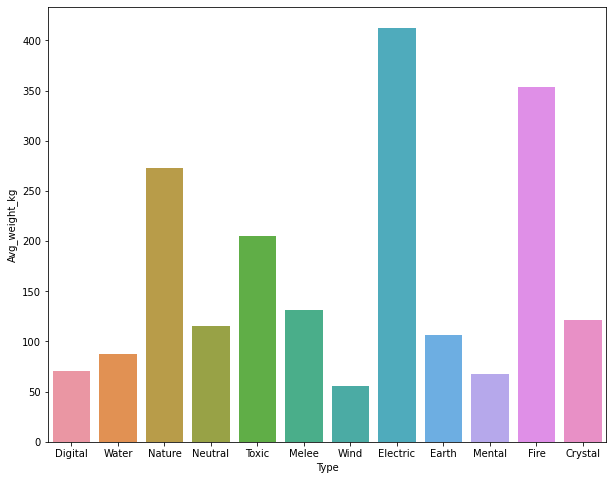

In [57]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_avg_temtem_type['Type'], y=df_avg_temtem_type['Avg_weight_kg'])

In [58]:
# Adicionando total de temtem por tipos
for type_of_temtem in df_avg_temtem_type['Type']:
    qtd_temtem = len(df_temtem_com_indice[(df_temtem_com_indice['type 1'] == type_of_temtem) | (df_temtem_com_indice['type 2'] == type_of_temtem)])
    df_avg_temtem_type.loc[df_avg_temtem_type['Type'] == type_of_temtem, 'Total_Count'] = qtd_temtem

In [59]:
df_avg_temtem_type

,Type,Avg_atk,Avg_hp,Avg_sta,Avg_spd,Avg_def,Avg_spatk,Avg_spdef,Avg_total,Avg_height_cm,Avg_weight_kg,Total_Count
0,Digital,55.380952,64.428571,54.190476,55.000000,56.476190,55.904762,56.666667,398.047619,116.619048,70.333333,21.0
1,Water,59.227273,65.681818,57.590909,61.272727,54.954545,68.227273,57.318182,424.272727,145.681818,87.318182,22.0
2,Nature,56.583333,65.083333,58.625000,54.916667,57.041667,53.083333,62.625000,407.958333,144.666667,273.250000,24.0
3,Neutral,66.384615,68.846154,59.769231,60.692308,65.230769,59.384615,60.923077,441.230769,156.153846,115.076923,13.0
4,Toxic,59.550000,67.550000,49.600000,59.600000,58.000000,62.600000,59.550000,416.450000,153.300000,205.500000,20.0
5,Melee,69.333333,66.416667,53.583333,66.083333,62.583333,51.875000,51.541667,421.416667,160.750000,130.916667,24.0
6,Wind,58.952381,61.238095,52.095238,66.095238,57.809524,61.666667,64.809524,422.666667,133.714286,55.571429,21.0
7,Electric,62.400000,60.000000,54.450000,64.400000,52.550000,54.100000,57.500000,405.400000,190.400000,412.750000,20.0
8,Earth,66.681818,68.681818,51.727273,57.045455,64.545455,51.000000,49.772727,409.454545,140.863636,106.500000,22.0
9,Mental,61.000000,56.000000,55.857143,63.904762,50.619048,63.523810,62.428571,413.333333,143.190476,67.095238,21.0


In [60]:
df_avg_temtem_type.loc[df_avg_temtem_type['Type'] == 'Digital']

,Type,Avg_atk,Avg_hp,Avg_sta,Avg_spd,Avg_def,Avg_spatk,Avg_spdef,Avg_total,Avg_height_cm,Avg_weight_kg,Total_Count
0,Digital,55.380952,64.428571,54.190476,55.0,56.47619,55.904762,56.666667,398.047619,116.619048,70.333333,21.0


# Fim das análises por enquanto